# Data Exploration

In [2]:
!pip install -q imbalanced-learn

In [3]:
import boto3
import sagemaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

session = boto3.session.Session()
region = session.region_name
bucket = f"hospital-readmission-prediction-{region}"
s3 = session.client(service_name="s3", region_name=region)

# Remember our data is now in landing/processed/
data_path = f's3://{bucket}/landing/processed/diabetic_data.csv'

[01/28/25 20:54:42] INFO     Found credentials from IAM Role:                                   ]8;id=27859;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=582469;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

# Step 1

**Deliverables**

1. Overall dataset size and shape
2. Exact readmission distribution
3. Visual representation of the class imbalance
4. Overview of feature types and any missing values
5. Sample of the actual data

Loading data from s3://hospital-readmission-prediction-us-east-1/landing/processed/diabetic_data.csv


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:283: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


[01/28/25 20:54:55] INFO     Found credentials from IAM Role:                                   ]8;id=918476;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=912813;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=910830;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=723612;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=971514;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=566819;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=815597;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=457480;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=642946;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=551953;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 20:54:56] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=213212;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=581650;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    


=== Dataset Overview ===
Total records: 101,766
Total features: 50

=== Readmission Distribution ===

Counts:
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Percentages:
NO     53.91
>30    34.93
<30    11.16
Name: readmitted, dtype: float64 %


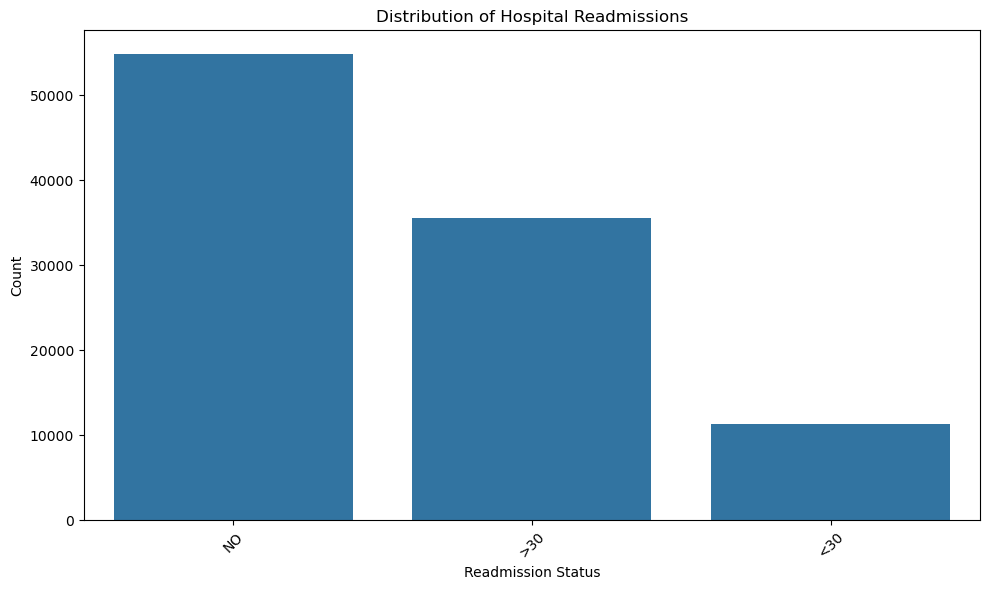


=== Feature Types ===
object    37
int64     13
dtype: int64

=== First few rows of data ===
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton ins

In [4]:
def explore_readmission_data():
   try:
       print(f"Loading data from {data_path}")
       df = pd.read_csv(data_path)
       
       print("\n=== Dataset Overview ===")
       print(f"Total records: {len(df):,}")
       print(f"Total features: {len(df.columns):,}")
       
       # Class distribution analysis
       print("\n=== Readmission Distribution ===")
       readmission_counts = df['readmitted'].value_counts()
       readmission_percentages = df['readmitted'].value_counts(normalize=True) * 100
       
       print("\nCounts:")
       print(readmission_counts)
       print("\nPercentages:")
       print(readmission_percentages.round(2), "%")
       
       # Visualize the imbalance
       plt.figure(figsize=(10, 6))
       sns.countplot(data=df, x='readmitted')
       plt.title('Distribution of Hospital Readmissions')
       plt.xlabel('Readmission Status')
       plt.ylabel('Count')
       plt.xticks(rotation=45)
       plt.tight_layout()
       plt.show()
       
       # Feature overview
       print("\n=== Feature Types ===")
       print(df.dtypes.value_counts())
       
       # Missing values check
       missing_values = df.isnull().sum()
       if missing_values.any():
           print("\n=== Missing Values ===")
           print(missing_values[missing_values > 0])
           
       # Sample of the data
       print("\n=== First few rows of data ===")
       print(df.head())
       
       return df
   
   except Exception as e:
       print(f"Error during exploration: {e}")
       return None

# Run exploration
df = explore_readmission_data()

These are only some columnns lets pull information for

1. The range of medications patients are on
2. The typical number of procedures
3. The distribution of primary diagnoses (diag_1)

[01/28/25 20:55:11] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=28466;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=217316;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=101974;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=597812;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=230515;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=173983;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 20:55:12] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=931611;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=702012;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=177052;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=788532;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    


=== First 10 entries of selected columns ===
   num_medications  num_procedures  diag_1
0                1               0  250.83
1               18               0     276
2               13               5     648
3               16               1       8
4                8               0     197
5               16               6     414
6               21               1     414
7               12               0     428
8               28               2     398
9               18               3     434

=== Basic statistics for selected columns ===
       num_medications  num_procedures
count    101766.000000   101766.000000
mean         16.021844        1.339730
std           8.127566        1.705807
min           1.000000        0.000000
25%          10.000000        0.000000
50%          15.000000        1.000000
75%          20.000000        2.000000
max          81.000000        6.000000


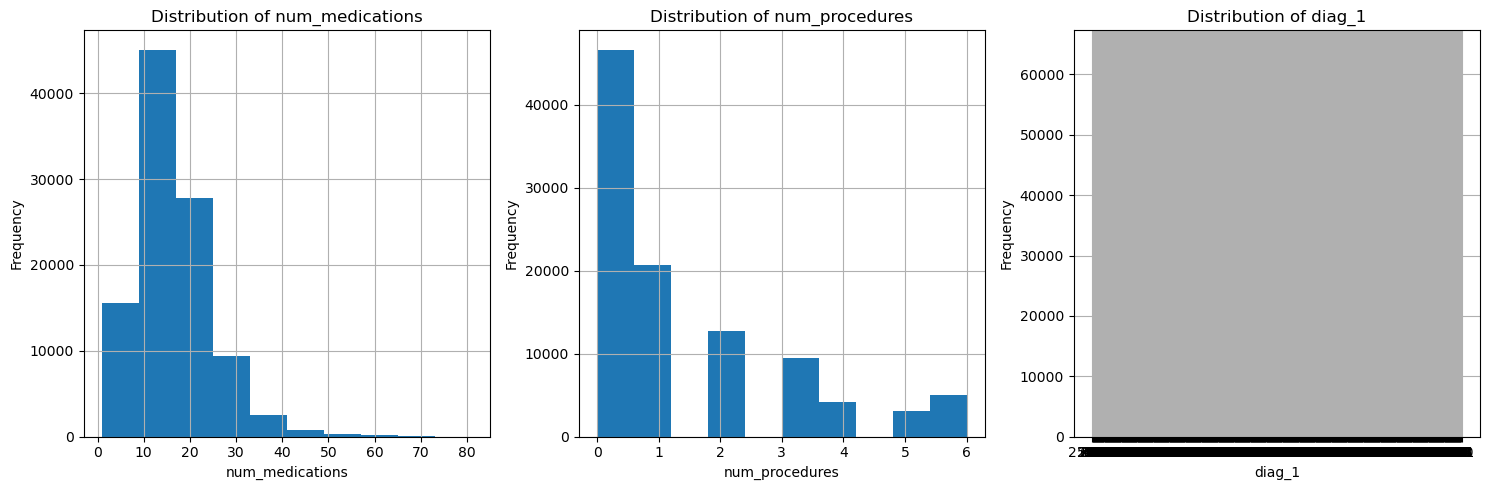

In [5]:
def view_specific_columns():
   try:
       # Load data
       df = pd.read_csv(data_path)
       
       # Select specific columns
       columns_of_interest = ['num_medications', 'num_procedures', 'diag_1']
       
       print("\n=== First 10 entries of selected columns ===")
       print(df[columns_of_interest].head(10))
       
       # Basic statistics for these columns
       print("\n=== Basic statistics for selected columns ===")
       print(df[columns_of_interest].describe())
       
       # Distribution visualization
       plt.figure(figsize=(15, 5))
       
       for i, col in enumerate(columns_of_interest):
           plt.subplot(1, 3, i+1)
           df[col].hist()
           plt.title(f'Distribution of {col}')
           plt.xlabel(col)
           plt.ylabel('Frequency')
       
       plt.tight_layout()
       plt.show()
       
       return df[columns_of_interest]
       
   except Exception as e:
       print(f"Error viewing columns: {e}")
       return None

# View the specific columns
selected_data = view_specific_columns()

Number of Medications (num_medications):

1. Range: 1 to 81 medications
2. Mean: ~16 medications
3. Median: 15 medications

Notable: There are some extreme cases with up to 81 medications
Distribution appears right-skewed with most patients on 10-20 medications


Number of Procedures (num_procedures):

1. Range: 0 to 6 procedures
2. Mean: ~1.34 procedures
3. Most common: 0-2 procedures (75% of patients have 2 or fewer)

Very few patients have the maximum of 6 procedures


Primary Diagnosis (diag_1):

1. Contains ICD-9 codes (e.g., 250.83, 276, 648)
Appears to be categorical despite being numeric

Important codes to note:

250.xx series: Diabetes-related diagnoses
Other codes represent various comorbidities

**Next Steps medication Dosing Encoding**

1. First display the current unique values in each medication column
2. Apply the encoding based on the mapping shown in Image 2
3. Verify that each medication column has been properly encoded
4. Generate statistics similar to Image 3 for key medications

In [8]:
def examine_and_encode_medications():
    # Load the data
    df = pd.read_csv(data_path)
    
    # List of all medication columns based on Image 1
    medication_columns = [
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
        'miglitol', 'troglitazone', 'tolazamide', 'examide',
        'citoglipton', 'insulin', 'glyburide-metformin',
        'glipizide-metformin', 'glimepiride-pioglitazone',
        'metformin-rosiglitazone', 'metformin-pioglitazone'
    ]
    
    # First, let's look at unique values in each medication column
    print("Current unique values in medication columns:")
    for med in medication_columns:
        if med in df.columns:
            print(f"\n{med}: {df[med].unique()}")
            
    # Define the mapping as shown in Image 2
    medication_mapping = {
        'No': 0,      # Not prescribed
        'Steady': 1,  # Prescribed, no change
        'Down': 2,    # Prescribed, decreased
        'Up': 3       # Prescribed, increased
    }
    
    # Apply encoding
    print("\nApplying medication encoding...")
    for med in medication_columns:
        if med in df.columns:
            df[med] = df[med].map(medication_mapping)
            
    # Verify encoding
    print("\nVerification of medication encodings:")
    print("-" * 50)
    for med in medication_columns:
        if med in df.columns:
            unique_values = sorted(df[med].unique())
            print(f"{med:<25} Properly encoded: {unique_values}")
            
    # Generate statistics like in Image 3 for a few key medications
    key_meds = ['metformin', 'insulin', 'glipizide', 'glyburide']
    
    for med in key_meds:
        if med in df.columns:
            print(f"\n{med.upper()} Status:")
            print("-" * 40)
            print(f"{'Status':<20} {'Count':>8} {'Percentage':>12}")
            print("-" * 40)
            
            value_counts = df[med].value_counts()
            total = len(df)
            
            status_labels = {
                0: "Not Prescribed",
                1: "Steady Dose",
                2: "Decreased Dose",
                3: "Increased Dose"
            }
            
            for value in sorted(value_counts.index):
                count = value_counts[value]
                percentage = (count / total) * 100
                status = status_labels[value]
                print(f"{status:<20} {count:>8} {percentage:>11.2f}%")
    
    return df

# Run the examination and encoding
encoded_df = examine_and_encode_medications()

[01/28/25 21:04:12] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=415047;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=486065;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=6731;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=48061;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=25718;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=549710;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=598294;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=517934;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 21:04:13] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=564103;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=776339;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

Current unique values in medication columns:

metformin: ['No' 'Steady' 'Up' 'Down']

repaglinide: ['No' 'Up' 'Steady' 'Down']

nateglinide: ['No' 'Steady' 'Down' 'Up']

chlorpropamide: ['No' 'Steady' 'Down' 'Up']

glimepiride: ['No' 'Steady' 'Down' 'Up']

acetohexamide: ['No' 'Steady']

glipizide: ['No' 'Steady' 'Up' 'Down']

glyburide: ['No' 'Steady' 'Up' 'Down']

tolbutamide: ['No' 'Steady']

pioglitazone: ['No' 'Steady' 'Up' 'Down']

rosiglitazone: ['No' 'Steady' 'Up' 'Down']

acarbose: ['No' 'Steady' 'Up' 'Down']

miglitol: ['No' 'Steady' 'Down' 'Up']

troglitazone: ['No' 'Steady']

tolazamide: ['No' 'Steady' 'Up']

examide: ['No']

citoglipton: ['No']

insulin: ['No' 'Up' 'Steady' 'Down']

glyburide-metformin: ['No' 'Steady' 'Down' 'Up']

glipizide-metformin: ['No' 'Steady']

glimepiride-pioglitazone: ['No' 'Steady']

metformin-rosiglitazone: ['No' 'Steady']

metformin-pioglitazone: ['No' 'Steady']

Applying medication encoding...

Verification of medication encodings:
----------

**The medication encoding has been successfully implemented and verified. I'm going to save this encoded data to the data lake's silver tier since this is a feature engineering step.**

In [10]:
import boto3
from datetime import datetime
import json

# Recreate our session
session = boto3.session.Session()
region = session.region_name
bucket = f"hospital-readmission-prediction-{region}"
s3 = session.client(service_name="s3", region_name=region)

def save_encoded_data(encoded_df):
    try:
        # Define medication columns
        medication_columns = [
            'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
            'miglitol', 'troglitazone', 'tolazamide', 'examide',
            'citoglipton', 'insulin', 'glyburide-metformin',
            'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone'
        ]
        
        # Save the encoded dataframe to CSV
        encoded_file_path = 'silver/features/encoded_medications.csv'
        
        # Convert to CSV buffer
        csv_buffer = encoded_df.to_csv(index=False)
        
        # Save to S3
        s3.put_object(
            Bucket=bucket,
            Key=encoded_file_path,
            Body=csv_buffer
        )
        
        print(f"Encoded data saved to s3://{bucket}/{encoded_file_path}")
        
        # Create metadata about the encoding
        encoding_metadata = {
            "medication_mapping": {
                "No": 0,      # Not prescribed
                "Steady": 1,  # Prescribed, no change
                "Down": 2,    # Prescribed, decreased
                "Up": 3       # Prescribed, increased
            },
            "processed_medications": medication_columns,
            "timestamp": datetime.now().isoformat(),
            "records_processed": len(encoded_df)
        }
        
        # Save metadata
        s3.put_object(
            Bucket=bucket,
            Key='metadata/quality_reports/medication_encoding_metadata.json',
            Body=json.dumps(encoding_metadata, indent=2)
        )
        
        print("Metadata saved successfully")
        return True
        
    except Exception as e:
        print(f"Error saving encoded data: {e}")
        return False

# Save the encoded data
save_successful = save_encoded_data(encoded_df)

[01/28/25 21:07:34] INFO     Found credentials from IAM Role:                                   ]8;id=965614;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=970669;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

Encoded data saved to s3://hospital-readmission-prediction-us-east-1/silver/features/encoded_medications.csv
Metadata saved successfully


Checking if anything else needs to be encoded

In [11]:
def check_categorical_encodings():
    # Load the data
    df = pd.read_csv(data_path)
    
    # List of categorical columns we're interested in
    categorical_columns = ['race', 'gender', 'age', 'weight', 
                         'admission_type_id', 'discharge_disposition_id', 
                         'admission_source_id', 'readmitted']
    
    print("=== Current Encoding Status of Categorical Variables ===")
    print("-" * 50)
    
    for col in categorical_columns:
        if col in df.columns:
            unique_values = df[col].unique()
            print(f"\n{col}:")
            print(f"Unique values: {sorted(unique_values)}")
            print(f"Data type: {df[col].dtype}")
            print(f"Sample values: {df[col].head().tolist()}")
    
    return df[categorical_columns]

# Check encodings
cat_data = check_categorical_encodings()

[01/28/25 21:39:22] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=114563;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=614866;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=670462;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=716261;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=900977;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=464600;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=509114;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=515454;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=568888;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=493901;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

=== Current Encoding Status of Categorical Variables ===
--------------------------------------------------

race:
Unique values: ['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
Data type: object
Sample values: ['Caucasian', 'Caucasian', 'AfricanAmerican', 'Caucasian', 'Caucasian']

gender:
Unique values: ['Female', 'Male', 'Unknown/Invalid']
Data type: object
Sample values: ['Female', 'Female', 'Female', 'Male', 'Male']

age:
Unique values: ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Data type: object
Sample values: ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)']

weight:
Unique values: ['>200', '?', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[25-50)', '[50-75)', '[75-100)']
Data type: object
Sample values: ['?', '?', '?', '?', '?']

admission_type_id:
Unique values: [1, 2, 3, 4, 5, 6, 7, 8]
Data type: int64
Sample values: [6, 1, 1, 1, 1]

discharge_disposition_id:
Unique 

Need Encoding:

1. race (with '?' for missing values)
2. gender (with Unknown/Invalid)
3. age (currently in brackets)
4. weight (contains '?' and brackets)
5. readmitted (needs to be converted to numeric)

In [12]:
def encode_categorical_variables(df):
    # Create a copy to avoid modifying original
    df_encoded = df.copy()
    
    # 1. Race Encoding
    race_mapping = {
        'Caucasian': 0,
        'AfricanAmerican': 1,
        'Asian': 2,
        'Hispanic': 3,
        'Other': 4,
        '?': 5  # Missing values
    }
    df_encoded['race'] = df['race'].map(race_mapping)
    
    # 2. Gender Encoding
    gender_mapping = {
        'Female': 0,
        'Male': 1,
        'Unknown/Invalid': 2
    }
    df_encoded['gender'] = df['gender'].map(gender_mapping)
    
    # 3. Age Encoding (extract lower bound of age range)
    df_encoded['age'] = df['age'].apply(lambda x: int(x.strip('[]').split('-')[0]))
    
    # 4. Weight Encoding
    weight_mapping = {
        '[0-25)': 0,
        '[25-50)': 1,
        '[50-75)': 2,
        '[75-100)': 3,
        '[100-125)': 4,
        '[125-150)': 5,
        '[150-175)': 6,
        '[175-200)': 7,
        '>200': 8,
        '?': 9  # Missing values
    }
    df_encoded['weight'] = df['weight'].map(weight_mapping)
    
    # 5. Readmitted Encoding
    readmitted_mapping = {
        'NO': 0,
        '>30': 1,
        '<30': 2
    }
    df_encoded['readmitted'] = df['readmitted'].map(readmitted_mapping)
    
    # Create encoding metadata
    encoding_metadata = {
        'race_mapping': race_mapping,
        'gender_mapping': gender_mapping,
        'weight_mapping': weight_mapping,
        'readmitted_mapping': readmitted_mapping,
        'age_transformation': 'extracted lower bound from range'
    }
    
    # Save encoded data to silver tier
    csv_buffer = df_encoded.to_csv(index=False)
    s3.put_object(
        Bucket=bucket,
        Key='silver/features/encoded_categorical.csv',
        Body=csv_buffer
    )
    
    # Save encoding metadata
    s3.put_object(
        Bucket=bucket,
        Key='metadata/quality_reports/categorical_encoding_metadata.json',
        Body=json.dumps(encoding_metadata, indent=2)
    )
    
    print("Encoded categorical variables and saved to silver tier")
    return df_encoded

# Load data and apply encoding
df = pd.read_csv(data_path)
encoded_df = encode_categorical_variables(df)

# Display sample of encoded data
print("\nSample of encoded data:")
print(encoded_df[['race', 'gender', 'age', 'weight', 'readmitted']].head())

[01/28/25 21:40:58] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=432047;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=504960;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=922517;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=515384;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=992123;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=94142;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=216867;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=943990;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 21:40:59] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=209052;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=640083;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

Encoded categorical variables and saved to silver tier

Sample of encoded data:
   race  gender  age  weight  readmitted
0     0       0    0       9           0
1     0       0   10       9           1
2     1       0   20       9           0
3     0       1   30       9           0
4     0       1   40       9           0


Potential Issues to Address:

The high number of missing weight values (all 9's in our sample)

I'm going to save what I have so far

In [13]:
def save_full_encoded_dataset():
    try:
        # Combine with our previously encoded medication data
        encoded_file_path = 'silver/features/fully_encoded_dataset.csv'
        
        # Save to S3
        csv_buffer = encoded_df.to_csv(index=False)
        s3.put_object(
            Bucket=bucket,
            Key=encoded_file_path,
            Body=csv_buffer
        )
        
        # Create comprehensive metadata
        encoding_summary = {
            "timestamp": datetime.now().isoformat(),
            "records_processed": len(encoded_df),
            "encoded_features": {
                "categorical": ["race", "gender", "age", "weight", "readmitted"],
                "medications": list(encoded_df.filter(like='med').columns)
            },
            "encoding_schemes": {
                "race": {"Caucasian": 0, "AfricanAmerican": 1, "Asian": 2, "Hispanic": 3, "Other": 4, "Missing": 5},
                "gender": {"Female": 0, "Male": 1, "Unknown": 2},
                "age": "Lower bound of age range",
                "weight": "Categorical ranges 0-8, Missing=9",
                "readmitted": {"NO": 0, ">30": 1, "<30": 2}
            },
            "missing_value_summary": {
                "weight": len(encoded_df[encoded_df['weight'] == 9]),
                "race": len(encoded_df[encoded_df['race'] == 5])
            }
        }
        
        # Save metadata
        s3.put_object(
            Bucket=bucket,
            Key='metadata/quality_reports/full_encoding_metadata.json',
            Body=json.dumps(encoding_summary, indent=2)
        )
        
        print(f"Full encoded dataset saved to s3://{bucket}/{encoded_file_path}")
        print("Metadata saved successfully")
        return True
        
    except Exception as e:
        print(f"Error saving full encoded dataset: {e}")
        return False

# Save the fully encoded dataset
save_successful = save_full_encoded_dataset()

Full encoded dataset saved to s3://hospital-readmission-prediction-us-east-1/silver/features/fully_encoded_dataset.csv
Metadata saved successfully


Ok we need to analyze the weight column to see how many missing values we have and their impact.

In [14]:
def analyze_weight_column():
    # Load the data
    df = pd.read_csv(f's3://{bucket}/silver/features/fully_encoded_dataset.csv')
    
    # Analyze weight distribution
    total_records = len(df)
    missing_weights = sum(df['weight'] == 9)
    missing_percentage = (missing_weights / total_records) * 100
    
    print("=== Weight Column Analysis ===")
    print(f"Total records: {total_records:,}")
    print(f"Missing weight values: {missing_weights:,}")
    print(f"Missing percentage: {missing_percentage:.2f}%")
    
    # Check readmission distribution for missing vs non-missing weights
    print("\nReadmission rates by weight status:")
    missing_readmit = df[df['weight'] == 9]['readmitted'].value_counts(normalize=True)
    non_missing_readmit = df[df['weight'] != 9]['readmitted'].value_counts(normalize=True)
    
    print("\nReadmission distribution for missing weights:")
    print(missing_readmit)
    print("\nReadmission distribution for non-missing weights:")
    print(non_missing_readmit)
    
    return df

df = analyze_weight_column()

[01/28/25 21:45:17] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=588598;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=543536;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=385201;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=299017;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=537914;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=404983;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=330583;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=333544;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 21:45:18] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=390236;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=243932;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

=== Weight Column Analysis ===
Total records: 101,766
Missing weight values: 98,569
Missing percentage: 96.86%

Readmission rates by weight status:

Readmission distribution for missing weights:
0    0.543112
1    0.345291
2    0.111597
Name: readmitted, dtype: float64

Readmission distribution for non-missing weights:
1    0.472318
0    0.416015
2    0.111667
Name: readmitted, dtype: float64


We are going to drop the weight column

In [15]:
def remove_weight_feature():
    # Load current encoded dataset
    df = pd.read_csv(f's3://{bucket}/silver/features/fully_encoded_dataset.csv')
    
    # Drop weight column
    df = df.drop('weight', axis=1)
    
    # Save updated dataset
    encoded_file_path = 'silver/features/fully_encoded_dataset_no_weight.csv'
    
    # Save to S3
    csv_buffer = df.to_csv(index=False)
    s3.put_object(
        Bucket=bucket,
        Key=encoded_file_path,
        Body=csv_buffer
    )
    
    # Update metadata
    update_metadata = {
        "timestamp": datetime.now().isoformat(),
        "action": "removed_weight_feature",
        "justification": {
            "missing_percentage": 96.86,
            "readmission_impact": "minimal difference in <30 day readmission rates",
            "decision": "dropped due to high missing rate and low predictive value"
        }
    }
    
    # Save metadata
    s3.put_object(
        Bucket=bucket,
        Key='metadata/quality_reports/weight_feature_removal.json',
        Body=json.dumps(update_metadata, indent=2)
    )
    
    print(f"Updated dataset (without weight) saved to s3://{bucket}/{encoded_file_path}")
    print("Metadata updated successfully")
    return df

# Remove weight feature and save updated dataset
df_no_weight = remove_weight_feature()

[01/28/25 21:48:27] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=665282;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=556190;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=269664;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=137264;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=199539;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=704548;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 21:48:28] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=24565;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=814511;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=658476;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=140027;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

Updated dataset (without weight) saved to s3://hospital-readmission-prediction-us-east-1/silver/features/fully_encoded_dataset_no_weight.csv
Metadata updated successfully


# Next Steps

1. Analyze relationships between medication changes and readmission rates

2. Examine feature correlations with readmission
   
4. Move forward with addressing the class imbalance issue**

In [17]:
def analyze_medication_readmission_relationships():
    # Load our encoded dataset
    df = pd.read_csv(f's3://{bucket}/silver/features/fully_encoded_dataset_no_weight.csv')
    
    # List of medication columns
    med_columns = [col for col in df.columns if col in [
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
        'miglitol', 'troglitazone', 'tolazamide', 'examide',
        'citoglipton', 'insulin'
    ]]
    
    print("=== Medication Changes vs Readmission Analysis ===")
    
    # For each medication, analyze readmission rates by medication status
    for med in med_columns:
        print(f"\n{med.upper()} Analysis:")
        print("-" * 40)
        
        # Create cross-tabulation
        crosstab = pd.crosstab(df[med], df['readmitted'], normalize='index') * 100
        
        print("Readmission rates by medication status (%):")
        print("0 = No readmission")
        print("1 = >30 days readmission")
        print("2 = <30 days readmission")
        print(crosstab.round(2))
        
        # Chi-square test for independence
        chi2, p_value = chi2_contingency(pd.crosstab(df[med], df['readmitted']))[:2]
        print(f"\nChi-square p-value: {p_value:.10f}")
    
    return df

# Run the analysis
from scipy.stats import chi2_contingency
df = analyze_medication_readmission_relationships()

[01/28/25 21:53:28] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=881392;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=413148;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=854451;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=880063;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=317382;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=220421;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=261076;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=268153;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=240266;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=517540;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

=== Medication Changes vs Readmission Analysis ===

METFORMIN Analysis:
----------------------------------------
Readmission rates by medication status (%):
0 = No readmission
1 = >30 days readmission
2 = <30 days readmission
readmitted      0      1      2
metformin                      
Down        54.96  33.04  12.00
No          53.22  35.26  11.52
Steady      56.66  33.63   9.71
Up          59.23  32.52   8.25

Chi-square p-value: 0.0000000000

REPAGLINIDE Analysis:
----------------------------------------
Readmission rates by medication status (%):
0 = No readmission
1 = >30 days readmission
2 = <30 days readmission
readmitted       0      1      2
repaglinide                     
Down         51.11  42.22   6.67
No           54.05  34.83  11.13
Steady       44.36  42.49  13.15
Up           51.82  30.00  18.18

Chi-square p-value: 0.0000000001

NATEGLINIDE Analysis:
----------------------------------------
Readmission rates by medication status (%):
0 = No readmission
1 = >30 days

# Medication Analysis

**Most Significant Medications (based on very low p-values < 0.001):**


1. Insulin
2. Metformin
3. Glipizide
4. Rosiglitazone
5. Repaglinide

**These medications show strong statistical relationships with readmission rates.**

Key Patterns:


Insulin: When dosage is changed (Up or Down), readmission rates increase

1. Down: 52.79% readmission rate
2. Up: 51.54% readmission rate
3. No/Steady: Lower readmission rates


Metformin: Increasing the dose seems beneficial

1. Up: Lowest readmission rate (40.77%)
2. Down: Higher readmission rate (45.04%)




**Less Important Medications:**


1. Examide and Citoglipton (p-value = 1.0) show no relationship with readmission
2. Nateglinide, Chlorpropamide, and several others show weak or no significant relationships


**General Trend:**

Changes in medication (especially decreases) often correlate with higher readmission rates, suggesting that medication adjustments might be an indicator of patient stability.

**Given what I've learned about the medication relationships with readmission, let's examine other important features in the dataset. The next logical step would be to analyze demographic and clinical features:**

[01/28/25 22:10:58] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=137383;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=18325;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=374476;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=895177;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=431641;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=946456;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

                    INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=432866;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=413096;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

[01/28/25 22:10:59] INFO     Skipping checksum validation. Response did not contain one of the  ]8;id=670042;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py\httpchecksum.py]8;;\:]8;id=815652;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/httpchecksum.py#481\481]8;;\
                             following algorithms: ['crc32', 'sha1', 'sha256'].                                    

=== Key Features Analysis ===

Numeric Features Statistics:
       time_in_hospital  num_medications  num_procedures
count     101766.000000    101766.000000   101766.000000
mean           4.395987        16.021844        1.339730
std            2.985108         8.127566        1.705807
min            1.000000         1.000000        0.000000
25%            2.000000        10.000000        0.000000
50%            4.000000        15.000000        1.000000
75%            6.000000        20.000000        2.000000
max           14.000000        81.000000        6.000000

Readmission Rates by Demographics:

RACE Analysis:
readmitted      0      1      2
race                           
0           53.07  35.64  11.29
1           54.25  34.53  11.22
2           64.74  25.12  10.14
3           58.08  31.52  10.41
4           60.76  29.61   9.63
5           68.06  23.67   8.27

GENDER Analysis:
readmitted       0      1      2
gender                          
0            53.08  35.68  11.25
1 

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=903739;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=321901;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=467727;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=122285;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=859441;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=153111;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

[01/28/25 22:11:00] INFO     Using categorical units to plot a list of strings that are all         ]8;id=723363;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=251183;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=700272;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=473064;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=810865;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=415960;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/category.py#224\224]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

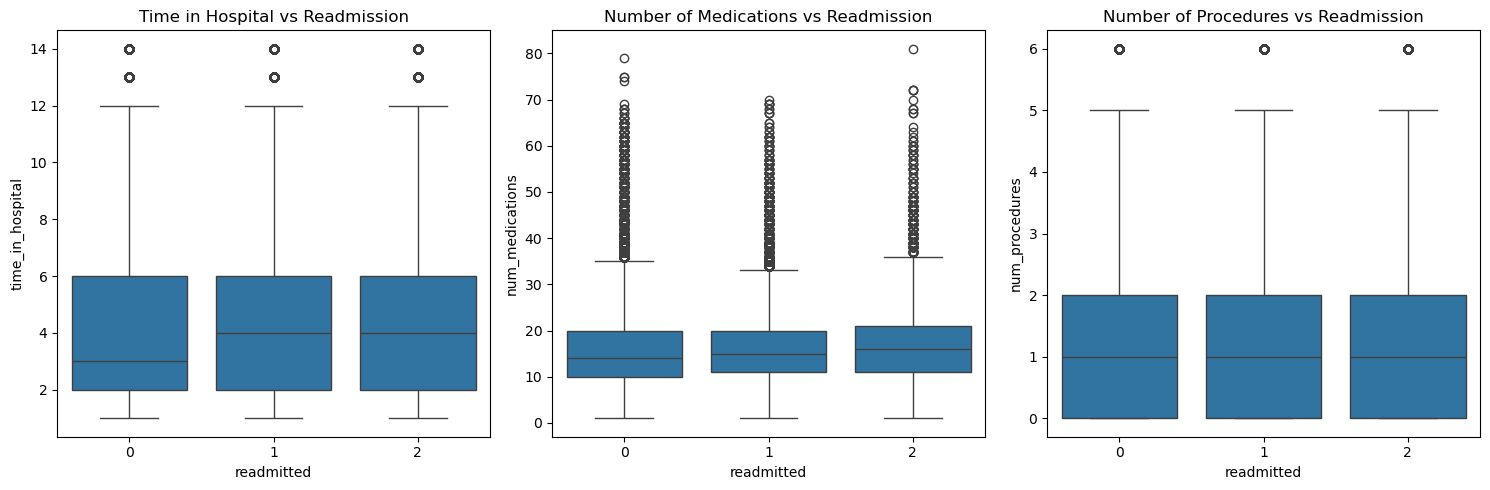

In [18]:
def analyze_key_features():
    # Load our encoded dataset
    df = pd.read_csv(f's3://{bucket}/silver/features/fully_encoded_dataset_no_weight.csv')
    
    # Key features to analyze
    features = ['race', 'gender', 'age', 'time_in_hospital', 
               'num_medications', 'num_procedures', 'readmitted']
    
    print("=== Key Features Analysis ===")
    
    # 1. Basic statistics for numeric features
    numeric_features = ['time_in_hospital', 'num_medications', 'num_procedures']
    print("\nNumeric Features Statistics:")
    print(df[numeric_features].describe())
    
    # 2. Readmission rates by demographic groups
    print("\nReadmission Rates by Demographics:")
    
    for feature in ['race', 'gender']:
        print(f"\n{feature.upper()} Analysis:")
        crosstab = pd.crosstab(df[feature], df['readmitted'], normalize='index') * 100
        print(crosstab.round(2))
    
    # 3. Age group analysis
    print("\nAGE Analysis:")
    crosstab = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100
    print(crosstab.round(2))
    
    # 4. Visualize relationships
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Time in hospital vs readmission
    plt.subplot(1, 3, 1)
    sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
    plt.title('Time in Hospital vs Readmission')
    
    # Plot 2: Number of medications vs readmission
    plt.subplot(1, 3, 2)
    sns.boxplot(x='readmitted', y='num_medications', data=df)
    plt.title('Number of Medications vs Readmission')
    
    # Plot 3: Number of procedures vs readmission
    plt.subplot(1, 3, 3)
    sns.boxplot(x='readmitted', y='num_procedures', data=df)
    plt.title('Number of Procedures vs Readmission')
    
    plt.tight_layout()
    plt.show()
    
    return df

# Run the analysis
df = analyze_key_features()

# Feature Analysis

**Time in Hospital (Left Graph):**


1. Most stays are between 2-6 days (middle box)
2. Median around 4 days
3. No major difference in stay length between readmission groups
4. Maximum stay is 14 days for all groups


**Number of Medications (Middle Graph):**


1. Median around 15 medications
2. Slight trend: patients readmitted within 30 days (2) have slightly higher medication counts
3. Wide range from 1 to 81 medications
4. Most patients receive 10-20 medications


**Number of Procedures (Right Graph):**


1. Most patients have 0-2 procedures
2. Maximum of 6 procedures
3. No strong relationship with readmission


**Demographics:**

Race (0=Caucasian, 1=AfricanAmerican, 2=Asian, etc.):

1. Asians (2) have lowest readmission rate (35.26%)
2. Caucasians and African Americans have similar rates
3. Race category 5 (missing) has lowest readmission rate

Gender (0=Female, 1=Male):

1. Females: 46.92% readmission rate
2. Males: 45.12% readmission rate
3. Very similar patterns between genders

Age:

1. Young patients (0-10) have lowest readmission rates (18%)
2. Higher readmission rates in middle and older age groups
3. Peak readmission rates in 70-80 age range (48%)

This suggests that while individual features show some patterns, no single feature is a strong predictor of readmission